# Intervalo de confiança do coeficiente de correlação em relação ao tamanho amostral

Este script desenha o gráfico com o intervalo de confiança estimado para o $r_{pearson}$ para um intervalo de tamanho amostral.

Basta apenas entrar o com o valor do coeficiente, o nível de significância ($\alpha$) e escolher o valor mínimo e máximo do tamanho amostral.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

In [2]:
r_pearson = 0.9 # o coeficiente de correlação
alfa = 0.05 # o nível de singificância
min_n = 4 # o valor inicial do tamanho amostral (mínimo é 4)
max_n = 100 # o valor final do do tamanho amostral


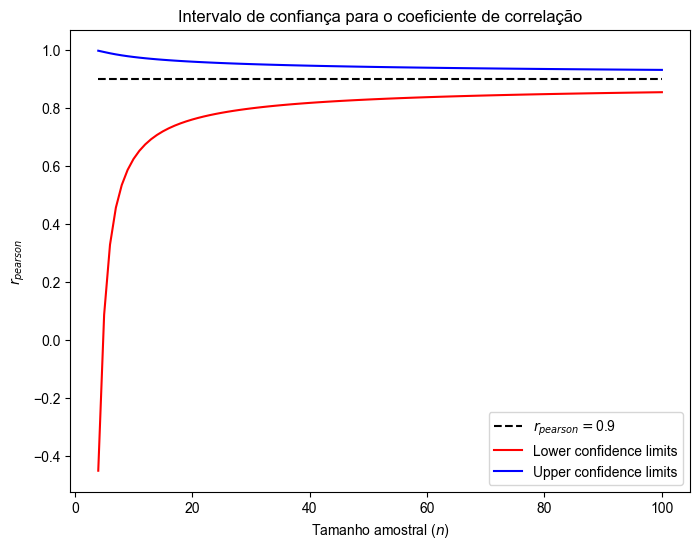

In [3]:
# criando valores inteiros de n, dentro do limite estabelecido
n_size = np.arange(min_n,max_n+1)

# transformando o valor do r de pearson
r_transformed = np.arctanh(r_pearson)

# obtendo o valor critico da distribuição Normal o alfa estabelecido
z_critical = stats.norm.ppf(1 - alfa/2)

# calculando o intervalo de confiança para cada tamanho amostral
ic = z_critical/np.sqrt(n_size-3)

# calculando os limties inferior e superior na unidade transformada
ic_lower_transformed = r_transformed - ic
ic_upper_transformed = r_transformed + ic

# transformando os limites para a distribuição r de pearson
ic_lower = np.tanh(ic_lower_transformed)
ic_upper = np.tanh(ic_upper_transformed)

# plotando o gráfico
# criando o canvas
plt.figure(figsize=(8,6))
# adicionando a linha teórica
text = "$r_{pearson} = $" + f"{round(r_pearson, 4)}"
plt.plot([n_size.min(), n_size.max()], [r_pearson,r_pearson], label=text, c='k', ls='--')
# adicionando o limite inferior
plt.plot(n_size, ic_lower, label="Lower confidence limits", c='r')
# adicionando o limite superior
plt.plot(n_size, ic_upper, label="Upper confidence limits", c='b')
# adicionando titulos
plt.title("Intervalo de confiança para o coeficiente de correlação")
plt.xlabel("Tamanho amostral ($n$)")
plt.ylabel("$r_{pearson}$")
# adicionando a legenda, com posição variando com o sinal de r de pearson
if r_pearson < 0.0:
    plt.legend(loc=1)
else:
    plt.legend(loc=4)
# plt.savefig("r_pearson.png", dpi=100, bbox_inches='tight')    
plt.show()